In [3]:
import sys
!{sys.executable} -m pip install citipy

In [4]:
from citipy import citipy 

In [5]:
import numpy as np 
latituderange=(-90,90) 
longituderange=(-180,180)
latitudelongitude=[]
cities=[] 
latitude= np.random.uniform(-90,90,2000)
longitude= np.random.uniform(-180,180,2000)
latitudelongitude= zip(latitude,longitude)
for latlon in latitudelongitude:
    city=citipy.nearest_city(latlon[0],latlon[1]).city_name
    if city not in cities:
        cities.append(city)
print(len(cities)) 
print(cities)
    

743
['albany', 'hobart', 'kamyzyak', 'carrboro', 'ponta do sol', 'anchorage', 'kyra', 'busselton', 'new norfolk', 'sitka', 'vetovo', 'urengoy', 'atuona', 'puerto ayora', 'ushuaia', 'port elizabeth', 'avarua', 'palauig', 'alofi', 'kapaa', 'east london', 'kieta', 'torbay', 'mersin', 'goundam', 'vilhena', 'jamestown', 'arraial do cabo', 'sabancuy', 'barentsburg', 'taoudenni', 'punta arenas', 'kamenka', 'bhadrachalam', 'tuatapere', 'tiksi', 'saint-philippe', 'yellowknife', 'strezhevoy', 'esperantinopolis', 'bengkulu', 'kuche', 'mataura', 'butaritari', 'orcopampa', 'warqla', 'kodiak', 'whyalla', 'luwuk', 'tazovskiy', 'nizhneyansk', 'taolanaro', 'amapa', 'santa maria', 'broadstairs', 'flinders', 'saldanha', 'cape town', 'pervomayskoye', 'vanimo', 'rolim de moura', 'sentyabrskiy', 'san jeronimo', 'gamba', 'georgetown', 'deulgaon raja', 'bereda', 'pontianak', 'rikitea', 'lazaro cardenas', 'mys shmidta', 'mataram', 'gwadar', 'kadykchan', 'cherskiy', 'saskylakh', 'tilichiki', 'hasanabad', 'sokon

In [7]:
import requests 
import urllib 
import json
url="http://api.openweathermap.org/data/2.5/weather?q=" 
appid="20c4413975c1bc2885c5e18b18d0ac3d"
citiesinfo=[]
for i, city in enumerate(cities):
    cityurl=url+urllib.request.pathname2url(city)+"&appid="+appid 
    try:
    #    print(cityurl)
        cw=requests.get(cityurl).json()
    #    print(cw)
    #    break
        citiesinfo.append({
            "city":city,
            "lat":cw['coord']['lat'],
            "lon":cw['coord']['lon'],
            "temp":cw['main']['temp'],
            "humidity":cw['main']['humidity'],
            "clouds":cw['clouds']['all'],
            "wind":cw['wind']['speed'],
            "country":cw['sys']['country']
                          })
        
        
    except:
        print("city not found")
        print(len(citiesinfo))
        pass
print(len(citiesinfo))
    

city not found
29
city not found
40
city not found
43
city not found
47
city not found
47
city not found
55
city not found
55
city not found
63
city not found
65
city not found
86
city not found
125
city not found
127
city not found
128
city not found
154
city not found
170
city not found
205
city not found
213
city not found
232
city not found
250
city not found
250
city not found
254
city not found
254
city not found
267
city not found
268
city not found
288
city not found
304
city not found
304
city not found
314
city not found
335
city not found
337
city not found
337
city not found
348
city not found
352
city not found
356
city not found
360
city not found
367
city not found
384
city not found
389
city not found
393
city not found
408
city not found
426
city not found
440
city not found
466
city not found
478
city not found
498
city not found
516
city not found
519
city not found
528
city not found
535
city not found
540
city not found
546
city not found
557
city not found
566
cit

In [8]:
import pandas as pd
citypd=pd.DataFrame(citiesinfo)
citypd.to_csv("myweatherfile.csv",encoding="utf-8",index=False)

In [11]:
print(citypd) 

            city      lat       lon    temp  humidity  clouds  wind
0    yellowknife  62.4560 -114.3525  265.15        86      90  6.17
1        huarmey -10.0681  -78.1522  297.15        75      29  5.15
2         atuona  -9.8000 -139.0333  300.11        72      15  6.56
3        makueni  -1.8041   37.6203  291.23        87      94  0.22
4        husavik  66.0449  -17.3389  269.15        80      90  7.20
..           ...      ...       ...     ...       ...     ...   ...
654        telma  52.6983  103.7097  271.15        74       0  3.00
655    aginskoye  51.1000  114.5300  274.43        61      17  1.74
656      mayskiy  47.6931   40.1025  284.15        87      20  3.00
657         nuuk  64.1835  -51.7216  273.92        60      75  2.06
658   filadelfia  39.9523  -75.1638  294.15        34      20  2.06

[659 rows x 7 columns]


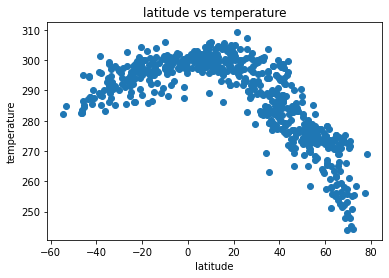

In [12]:
import matplotlib.pyplot as plt 
plt.scatter(citypd['lat'],citypd['temp'],marker='o')
plt.title('latitude vs temperature')
plt.xlabel('latitude') 
plt.ylabel('temperature')
plt.savefig('latitude vs temperature.png') 
plt.show() 

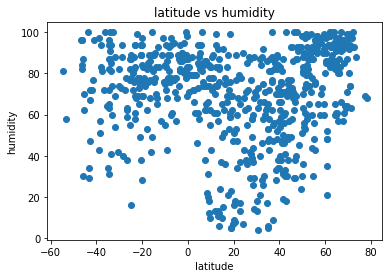

In [13]:
plt.scatter(citypd['lat'],citypd['humidity'],marker='o')
plt.title('latitude vs humidity')
plt.xlabel('latitude') 
plt.ylabel('humidity')
plt.savefig('latitude vs humidity.png') 
plt.show() 

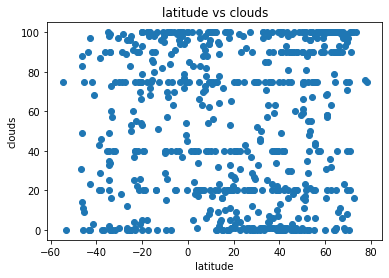

In [14]:
plt.scatter(citypd['lat'],citypd['clouds'],marker='o')
plt.title('latitude vs clouds')
plt.xlabel('latitude') 
plt.ylabel('clouds')
plt.savefig('latitude vs clouds.png') 
plt.show() 

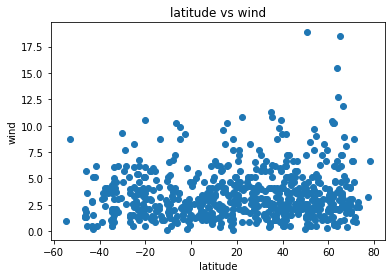

In [15]:
plt.scatter(citypd['lat'],citypd['wind'],marker='o')
plt.title('latitude vs wind')
plt.xlabel('latitude') 
plt.ylabel('wind')
plt.savefig('latitude vs wind.png') 
plt.show() 

In [16]:
northern=citypd.loc[citypd["lat"]>=0.0]
northern.reset_index(inplace=True)
southern=citypd.loc[citypd["lat"]<0.0]
southern.reset_index(inplace=True)

In [17]:
from scipy.stats import linregress
def plotlr(x,y,xlabel,ylabel,labelposition,fig):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y) 
    rgvalue=x*slope+intercept
    plt.scatter(x,y)
    plt.plot(x,rgvalue,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.savefig(fig)
    plt.show()


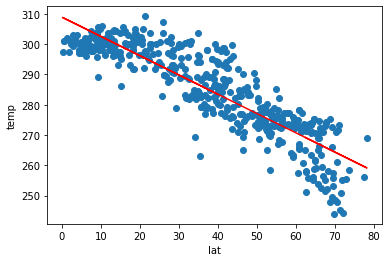

In [18]:
xlabel="lat"
ylabel="temp"
labelposition=(0,25)
plotlr(northern[xlabel],northern[ylabel],xlabel,ylabel,labelposition,"norlat tmp.png")

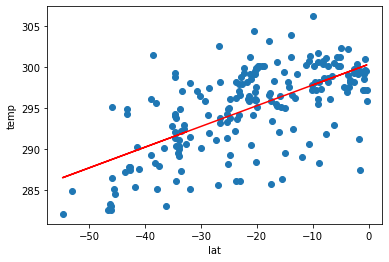

In [19]:
xlabel="lat"
ylabel="temp"
labelposition=(0,25)
plotlr(southern[xlabel],southern[ylabel],xlabel,ylabel,labelposition,"solat tmp.png")

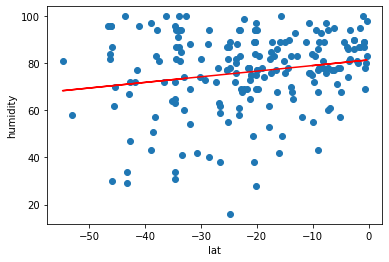

In [20]:
xlabel="lat"
ylabel="humidity"
labelposition=(0,25)
plotlr(southern[xlabel],southern[ylabel],xlabel,ylabel,labelposition,"solat humidity.png")

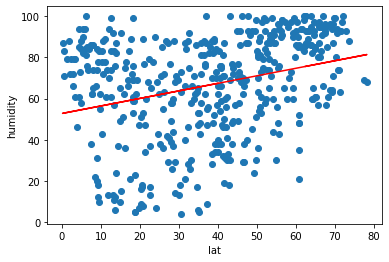

In [21]:
xlabel="lat"
ylabel="humidity"
labelposition=(0,25)
plotlr(northern[xlabel],northern[ylabel],xlabel,ylabel,labelposition,"nolat humidity.png")

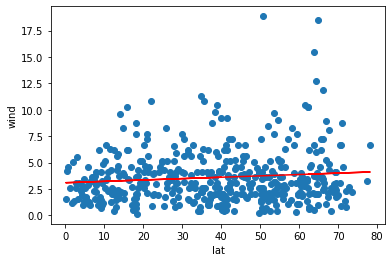

In [22]:
xlabel="lat"
ylabel="wind"
labelposition=(0,25)
plotlr(northern[xlabel],northern[ylabel],xlabel,ylabel,labelposition,"nolat wind.png")

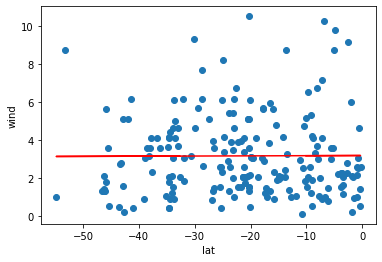

In [23]:
xlabel="lat"
ylabel="wind"
labelposition=(0,25)
plotlr(southern[xlabel],southern[ylabel],xlabel,ylabel,labelposition,"solat wind.png")

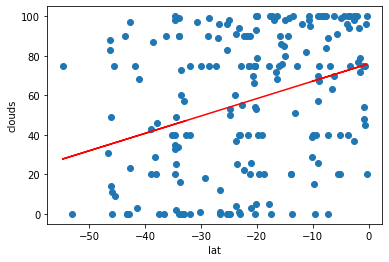

In [24]:
xlabel="lat"
ylabel="clouds"
labelposition=(0,25)
plotlr(southern[xlabel],southern[ylabel],xlabel,ylabel,labelposition,"solat clouds.png")

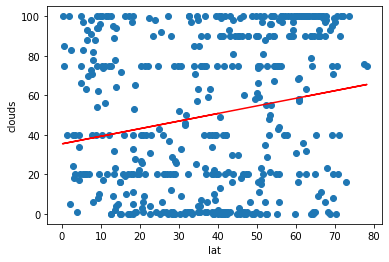

In [25]:
xlabel="lat"
ylabel="clouds"
labelposition=(0,25)
plotlr(northern[xlabel],northern[ylabel],xlabel,ylabel,labelposition,"nolat clouds.png")